In [2]:
import numpy as np
import math as math
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def hdv(D):
    values = [-1, 1]
    return np.random.choice(values, size=(1, D))

In [4]:
def cos_sim(x, y):
    num = (x @ y.T).item()
    denom = np.linalg.norm(x) * np.linalg.norm(y)
    return num / denom

On average in a 10000 dimension vector, half will be the same if entries are only -1 or 1.

In [5]:
x = hdv(10000)
y = hdv(10000)

print(np.sum(np.equal(x, y)))

5002


In [6]:
print(cos_sim(x, y))

0.0004


In [8]:
def range_hdvs(n, D):
    arr = np.zeros((n, D))

    #first vec
    arr[0, :] = hdv(D)

    chunk_size = D // n
    for i in range(1, n):
        
        #copy from prev vec
        arr[i, :] = arr[i-1, :]

        #random flip
        start = np.random.randint(0, D - chunk_size)
        end = start + chunk_size

        arr[i, start:end] = -arr[i-1, start:end]

    return arr

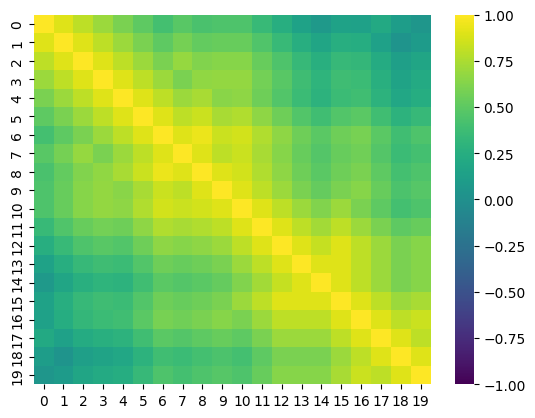

In [17]:
a = range_hdvs(20, 10000)
def cos_sim_matrix(hdvs):
    n = hdvs.shape[0]
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            matrix[i, j] = cos_sim(hdvs[i], hdvs[j])
    return matrix

sns.heatmap(cos_sim_matrix(a), cmap='viridis', vmin=-1, vmax=1)
plt.show()